<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Manually_Graded_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a Python code cell
!apt-get install r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:

install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Question 1: Describe the meaning of stationarity in your own words. Why is it useful? Write three
to five substantive sentences about this, minimizing the use of symbols.**

**Answer 1:**

Stationarity in time series means that the statistical properties of the data remain constant over time. This concept is crucial because it allows for more reliable predictions and simplifies modeling, as patterns observed in the past can be expected to continue in the future. Stationary processes are characterized by relationships between values that depend only on the time difference between them, not on the specific time points. This property makes stationary series easier to analyze and model, forming the foundation for many forecasting techniques and statistical methods in time series analysis.

**Question 2: Describe what sample autocorrelation is supposed to measure. Explain why ρb(h)
is not meaningful for large values of h (even when it is defined). Why isn’t it really meaningful for
nonstationary processes?**

**Answer 2:**

**Sample Autocorrelation Purpose:** Sample autocorrelation measures the strength and direction of the linear relationship between observations in a time series and their lagged values, providing insights into repeating patterns, trends, and dependencies over time.

**What Sample Autocorrelation Measures:** Sample autocorrelation captures how values in a time series relate to their past values, allowing analysts to identify patterns and dependencies over time.

* It measures how the value of a variable at one point in time relates to its value at previous points in time.
* It helps identify repeating patterns or trends in the data over time.
* The sample autocorrelation function (ACF) provides these measurements for different lag values, showing how the correlation changes as the lag increases

The sample autocorrelation function (ACF) for a time series \( \{ X_t \} \) is typically calculated using the following formula:

$$
\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}
$$
 where
 * rho hat (h) is the sample autocorrelation at lag(h)
 * gamma hat (h) is the sample autocovariance at lag(h)
 * gamma hat (0) is the sample variance.

The sample autocovariance \( \hat{\gamma}(h) \) is calculated as:
$$
\hat{\gamma}(h) = \frac{1}{n} \sum_{t=1}^{n-h} (X_t - \bar{X})(X_{t+h} - \bar{X})
$$
where:
- \( n \) is the number of observations,
- \( X bar \) is the sample mean,
- \( X_t \) and \( X_{t+h} \) are observations at time \( t \) and \( t + h \), respectively.


**Sample autocorrelation is not meaningful for large values of h because:**

**Reduced Data Points:** As h increases, fewer data points are used in the calculation, leading to less reliable estimates of autocorrelation.

**Increased Noise Influence:** For large h, the calculation relies on a small subset of data, making the estimate less representative of the overall series.

**Wider Confidence Intervals:** Correlograms show that confidence intervals expand with larger lags, making it harder to distinguish significant correlations from noise.

**Diminishing Influence:** In most real-world series, the impact of past values decreases over time, making large lags less relevant for understanding current behavior.

**Takeaway for large h:** For large h, sample autocorrelation values become unreliable due to reduced data and increased noise, limiting the ACF's usefulness for detecting true dependencies in the series.

**Sample autocorrelation is not meaningful for nonstationary processes because:**

**Inconsistent Statistical Properties:** Nonstationarity implies changes in mean and variance over time, which violates the assumptions needed for meaningful ACF calculations.

**Unstable Relationships:** In nonstationary data, correlations at different lags reflect trends or shifts rather than stable, cyclic relationships, resulting in misleading values.

**Spurious Autocorrelations:** Trends and systematic changes in nonstationary data can inflate autocorrelation values, misrepresenting any true relationship in the series.

**Lack of Convergence:** The sample ACF of a nonstationary process does not stabilize to a theoretical value, unlike stationary processes. Hence, transformations like differencing are often necessary to obtain reliable ACF results, as illustrated with data like the Lake Huron series.

**Takeaway for nonstationary:** In nonstationary series, autocorrelation can be misleading because the ACF reflects changing data trends rather than stable relationships, making it challenging to interpret the true dependencies.

**Question 3:** **Perform some exploratory analysis on the dataset co2 similar to what we did in Module 1, Lesson 3. Can you perform some differencing operations on this dataset to make it plausibly
stationary? Try to limit yourself to 2 differencing operations, one of which may be a seasonal differencing. Include plots of the original dataset and the dataset after each differencing operation. Provide some
comments on your procedure**

**Answer 3:**

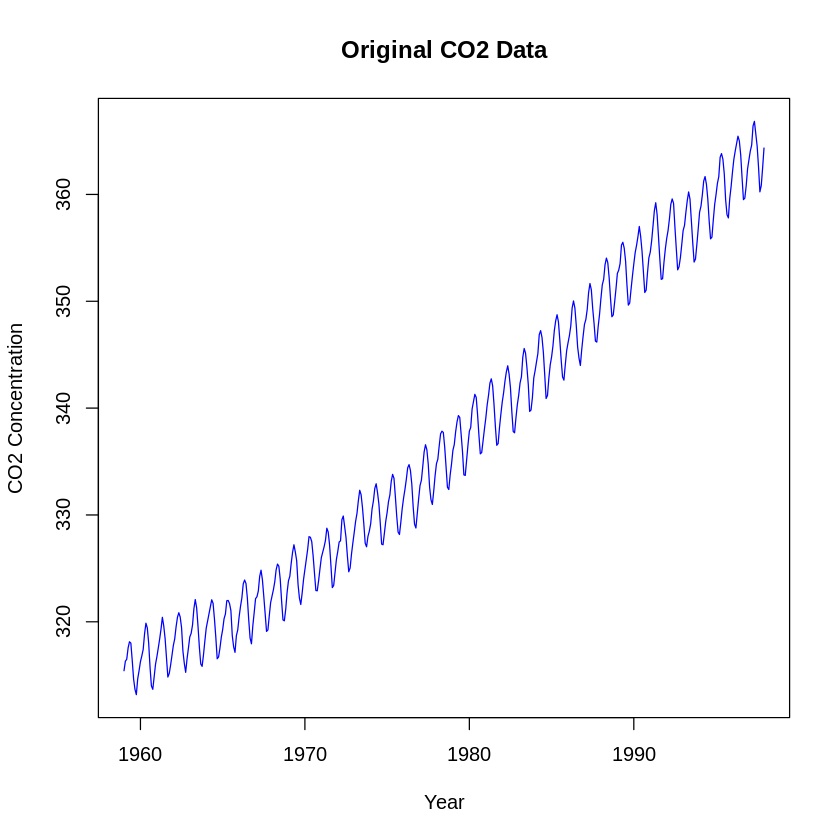

In [ ]:
# Load the necessary library
library(datasets)

# Load the co2 dataset
data("co2")

# Plot the original CO2 data
plot(co2, main = "Original CO2 Data", xlab = "Year", ylab = "CO2 Concentration", col = "blue")


**Comment on the original Data**: The plot of the original CO2 data reveals two prominent features:

* **Clear upward trend:** There's a strong, consistent increase in CO2 concentrations over time. This trend appears to be roughly linear, suggesting a steady rate of increase in atmospheric CO2 levels.

* **Visible seasonal pattern:** Superimposed on the long-term trend are regular fluctuations that repeat annually. These fluctuations likely correspond to the seasonal cycle of plant growth and decay, with CO2 levels typically lower in summer and higher in winter.

The combination of trend and seasonality indicates that the original series is non-stationary, as both its mean and variance change over time.

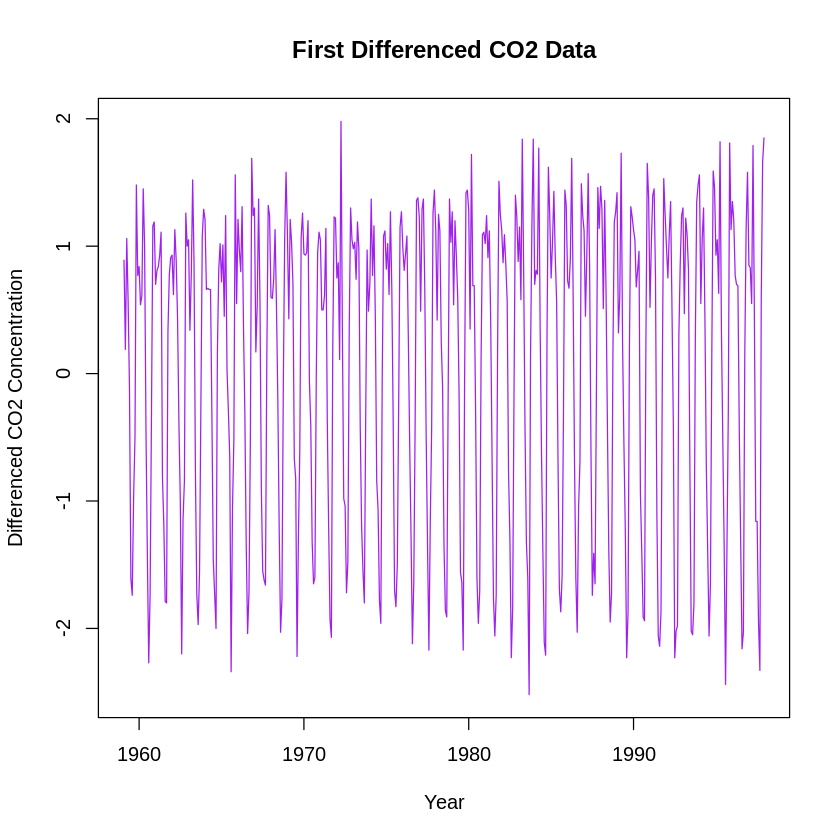

In [ ]:
# First differencing
co2_diff1 <- diff(co2)

# Plot the first differenced data
plot(co2_diff1, main = "First Differenced CO2 Data", xlab = "Year", ylab = "Differenced CO2 Concentration", col = "purple")


**Comment on First Differencing:**

After applying first-order differencing (subtracting each observation from its subsequent observation), we can observe:

* **Removal of long-term trend:** The strong upward trend visible in the original data is largely eliminated. This is because differencing effectively removes linear trends.

* **Persistence of seasonal pattern:** While the overall trend is removed, a clear seasonal pattern remains visible in the differenced data. This manifests as a regular, cyclical pattern in the differenced series.


While first differencing has addressed the trend component, the persistent seasonality suggests that the series is not yet fully stationary.

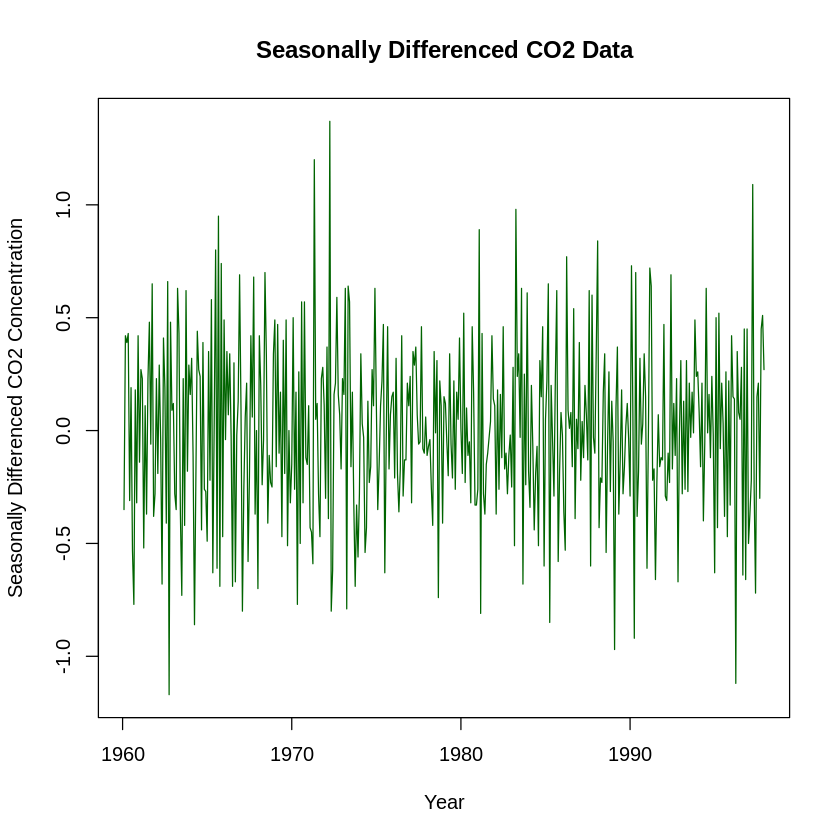

In [ ]:
# Seasonal differencing to remove seasonality
co2_diff_seasonal <- diff(co2_diff1, lag = 12)

# Plot the seasonally differenced data
plot(co2_diff_seasonal, main = "Seasonally Differenced CO2 Data", xlab = "Year", ylab = "Seasonally Differenced CO2 Concentration", col = "darkgreen")


**Comment on Seasonal differencing with a lag12:**

**Seasonal differencing:**

To address the remaining seasonality, seasonal differencing with a lag of 12 is applied (as this is monthly data). This operation involves subtracting each observation from the observation 12 months prior. The results show:

* **Removal of annual cyclical pattern:** The prominent seasonal fluctuations observed in the first-differenced series are largely eliminated.

* **Increased stability:** The resulting series appears more stable, with no obvious trend or regular patterns.

* **Potential over-differencing:** In some cases, seasonal differencing might lead to over-differencing, which could introduce artificial patterns or correlations. This needs to be carefully assessed. That over-differencing can lead to a whitenoise like series where all correlations disappear, potentially removing meanigful data patterns along with the noise.


**Results:**

After both differencing operations (first-order and seasonal), the resulting series exhibits characteristics more consistent with stationarity:

* **No obvious trends or patterns:** The clear trend and seasonal patterns observed in the original data are no longer apparent.
* **Remaining fluctuations:** While the series appears more stationary, some fluctuations and potential short-term correlations may still be present. These could be due to the inherent variability in CO2 measurements or other short-term factors affecting CO2 levels.

**Further analysis:**
To confirm stationarity and gain deeper insights into the differenced series, additional analyses are recommended such as ACF and PCAF plots.

In conclusion, these differencing operations have transformed the CO2 data to a **more plausibly stationary** form by addressing both the long-term trend and seasonal patterns.

However, it's important to note that while differencing can achieve stationarity, it also changes the **nature of the series**. Any models or forecasts based on the differenced data would need to be carefully interpreted and potentially transformed back to the original scale for meaningful insights about CO2 levels as explained in the lesson 3 of module 1 (Getting to Stationarity, section 1.3 from Module 1 Lesson 3 (Intro to Stationarity)).

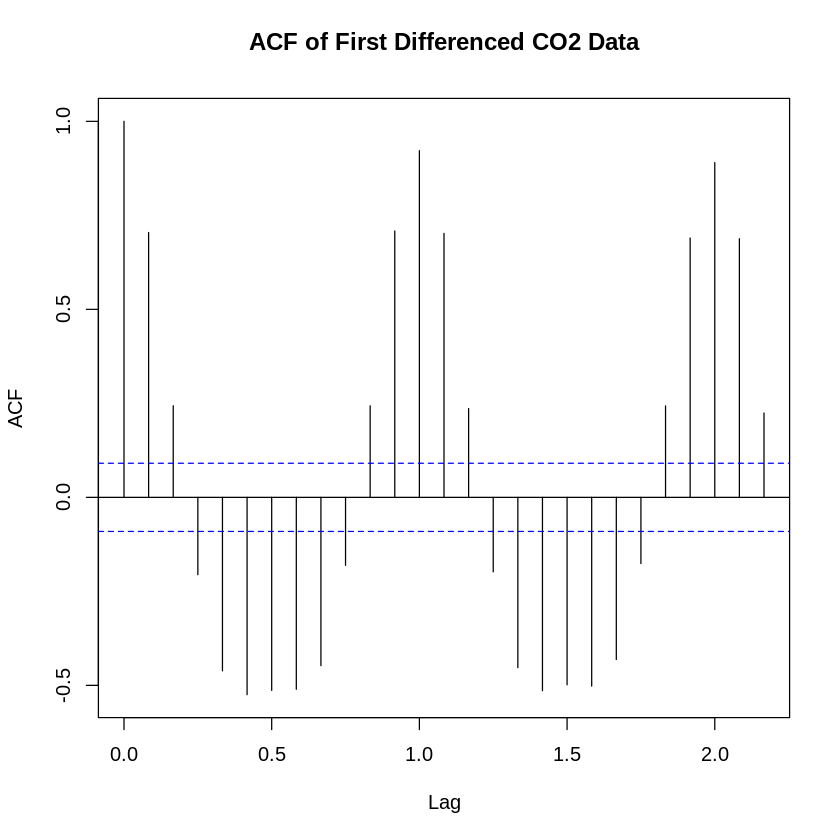

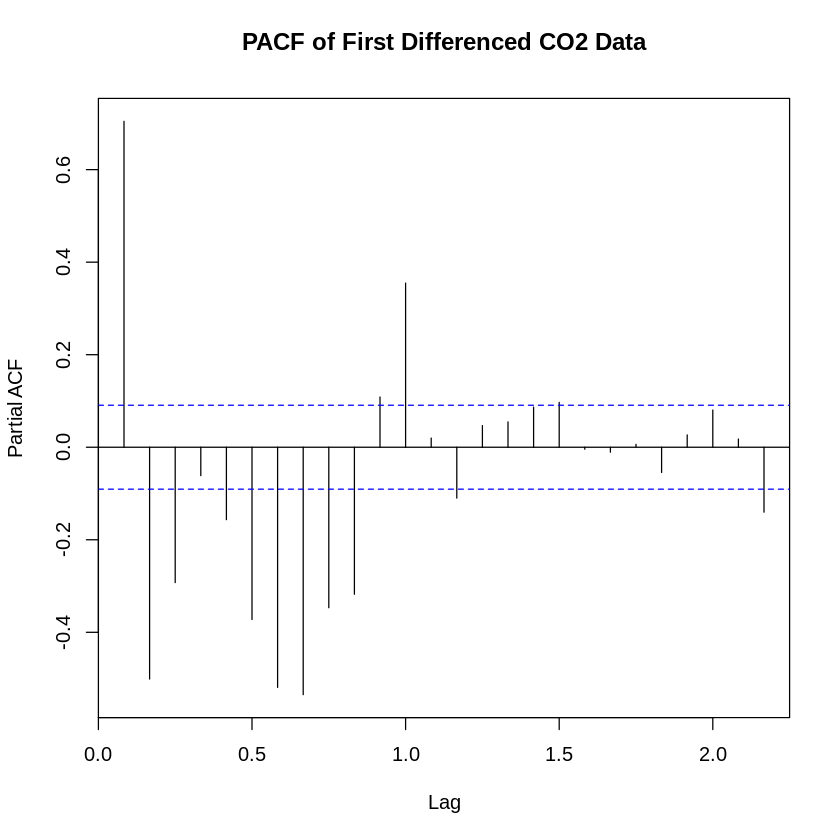

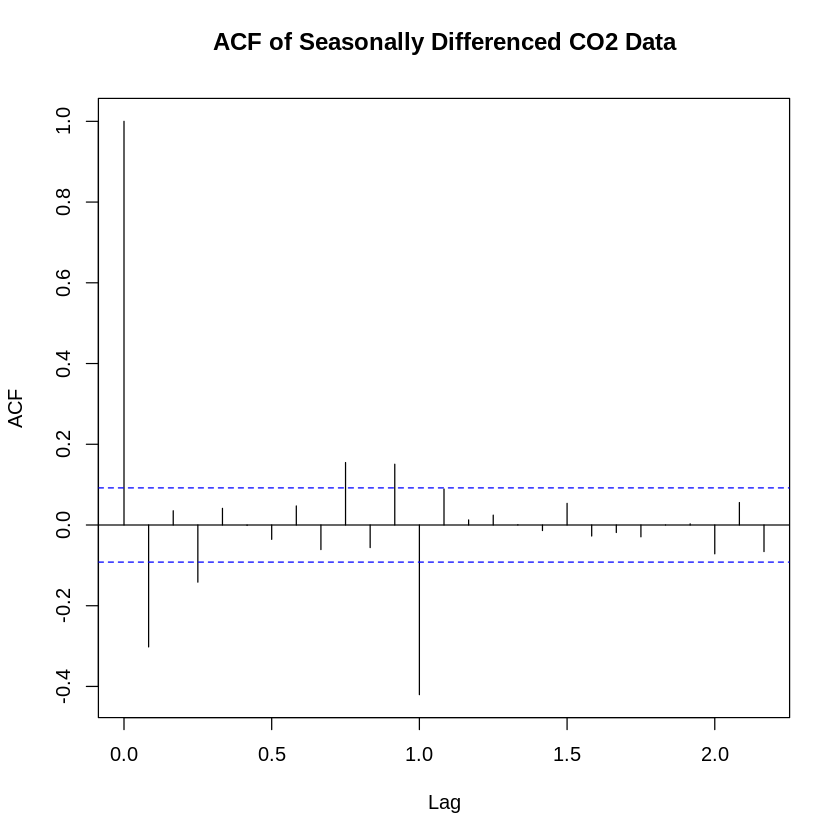

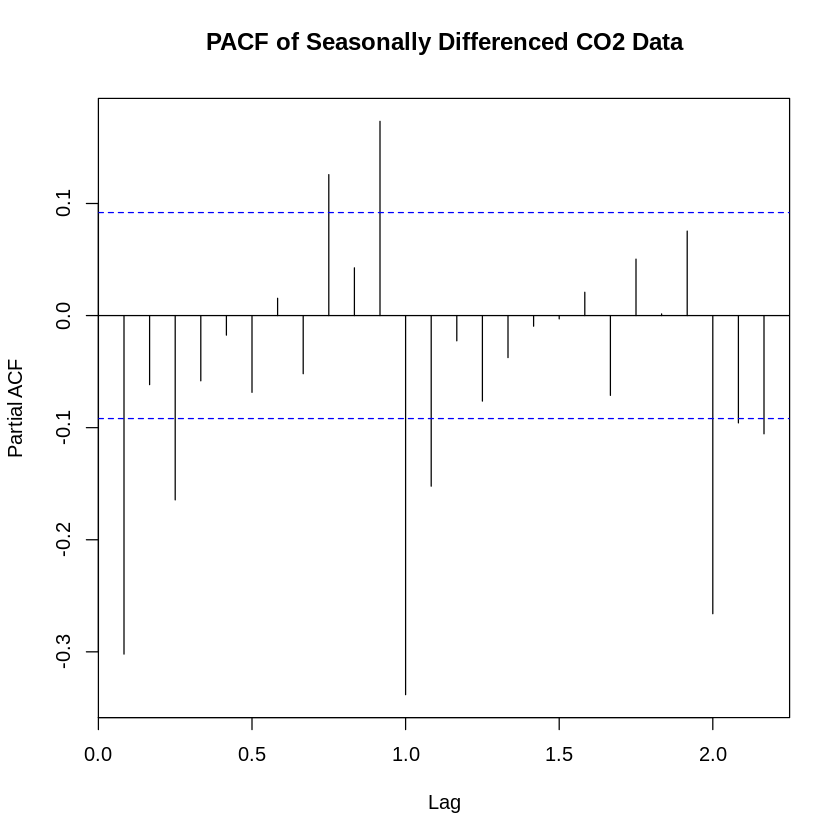

In [ ]:
# ACF and PACF for first differencing
acf(co2_diff1, main = "ACF of First Differenced CO2 Data")
pacf(co2_diff1, main = "PACF of First Differenced CO2 Data")

# ACF and PACF for seasonally differenced data
acf(co2_diff_seasonal, main = "ACF of Seasonally Differenced CO2 Data")
pacf(co2_diff_seasonal, main = "PACF of Seasonally Differenced CO2 Data")


**Question 4:** **For each of the following problems, compute formulas for the ACF of the given process. Show all
the steps you take to get to your answer. You are of course allowed (and encouraged) to use R to help
you with the computations, but you should include all steps necessary for someone who is not in front of
a computer to be able to follow your work. Note: You can and should use ARMAacf to check your final
answer. However, you cannot use it to do all the work for you: A list of ACF values without any work or
formula will be awarded zero credit.**

**The AR(2) process Xt − 0.8Xt−1 + 0.2Xt−2 = Wt**

**Answer 4:** **Step-by-Step Solution for ACF of the AR(2) Process**

Step-by-Step Solution for ACF of the AR(2) Process
Given the AR(2) process:

**Xt - 0.8Xt-1 + 0.2 Xt-2 = Wt**

We can write it as:

**Xt = 0.8Xt-1 - 0.2 Xt-2 + Wt**

Where Wt is white noise and variance σ square

**Step 1: Identify the AR coefficients:**
* Φ(1) = 0.8
* Φ(2)= -0.2

**Step 2: Write the Characteristic Polynomial**
The characteristic polynomial for this AR(2) model is:
**Φ(z) = 1 -0.8z + 0.2z^2 = (1-z/r1) (1-z/r2)**


**Step 3: Solve for the roots of the Polynomial:** The roots of the polynomial, which are calclated in R, tell us about the the behavior of the ACF. We can factor as r1 inverse and r2 inverse and executing in R "polyroot(c(0.2, -0.8,1))" or you can use the phi.zinv as mentioned in the code below as well and this yields **r1 inverse = 0.4+0.2i and r2 inverse = 0.4-0.2i**.

**Explanation:**
The polyroot function finds the roots of the characteristic polynomial. For this example, suppose we get distinct real roots: r1 and r2. If the roots were complex or repeated, the structure of the ACF would be adjusted accordingly. In this scenario - the roots are complex.


**We can also able to find the roots manually:**

Use the quadratic formula to solve Φ(z) = 0
* z = (0.8 ± √(0.8^2 - 4(1)(0.2))) / (2(1))
* z = (0.8 ± √(0.64 - 0.8)) / 2
* z = (0.8 ± √-0.16) / 2
* z = 0.4 ± 0.2i


**I can confirm based on these roots - These are indeed complex conjugates**

**Step 4: Verify Causality:**

**Since these numbers have magnitude less than 1 (or equivalently, roots |r1| and |r2| are greater than 1), I can conclude that the process is causal. For a causal process, the roots of the characteristic polynomial must lie outside the unit circle**



In [ ]:
# Using R, we find the roots of the polynomial
phi <- c(0.8, -0.2)
phi.zinv <- c(-phi[2], -phi[1], 1)
r.inv <- polyroot(phi.zinv)
r.inv

[1] 0.4+0.2i 0.4-0.2i

**Step 5: Set up the Difference Equation for the ACF**

Multiplying both sides X(t-h), take the expectation, and divide by γx(0), the result is:

**ρx(h) - 0.8ρx(h-1) + 0.2ρx(h-2) = 0, for h ≥ 2**


**Step 6 Determining the initial conditions:**

To fully determine the ACF, we need values for ρX(0) and ρX(1)
* Initial condition ρX(0): by definition ρX(0) = 1.
* Initial Condition for ρX(1) = Φ(1)/(1-Φ(2)) = 0.8/(1-(-0.2)) = 0.8/1.2 = 0.666666
* Thus, ρx(x) = 0.66667
* We use ρx(0) =1 and ρx(1) ~ 0.66667 to anchor the ACF formula by determining the constants alpha and theta.

**Step 7 Solution for complex conjugate roots, difference equation reads:**

The important thing is that c[1] and c[2] are complex conjugates. Therefore the solution formula for our difference equation reads.
* ρx(h) = c1r1 ^(-h) + c2r2 ^(-h) = 2Re(c1r1 ^(-h))

* This formula represents an oscillatory ACF that decays exponentially, where beta controls the decay rate and sets the oscillation frequency.


**Step 8 Solve for c1 and c2:** using R below



In [ ]:
A <- matrix(c(1, r.inv[1], 1, r.inv[2]), 2, 2)
b <- c(1, phi[1]/(1-phi[2]))
c <- solve(A, b)
c

# The below real numbers are gathered based on quick R instead of doing it by hand. This helps in final calculation of ACF in step 4
alpha <- Mod(c[1])  # Scale factor for ACF
theta <- Arg(c[1])  # Phase shift based on initial conditions
beta <- Mod(r.inv[1])  # Decay rate (modulus of the roots)
phi1 <- Arg(r.inv[1])  # Oscillation frequency (angle of roots)

alpha
theta
beta
phi1

[1] 0.5-0.6666667i 0.5+0.6666667i

[1] 0.8333333

[1] -0.9272952

[1] 0.4472136

[1] 0.4636476



**Step 9: Final ACF Formula**
Using the formula for complex conjugate roots and the values of beta and phi, we have:

**ρx(h) = 2 * α * β^h * cos( h * Φ + θ)**

Where
* alpha : Scale factor for ACF
* theta : Phase shift based on initial conditions
* beta : Decay rate (modulus of the roots)
* phi1 : Oscillation frequency (angle of roots)


**ρx(h) = 2 * 0.83 * 0.44^h * cos( h * 0.46 + (-0.92))**


In [ ]:
rho.X <- NULL
for(h in 1:10){
rho.X[h] = 2*alpha*beta^h*cos(h*phi1 + theta)}
rho.X

[1]  0.6666666667  0.3333333333  0.1333333333  0.0400000000  0.0053333333
 [6] -0.0037333333 -0.0040533333 -0.0024960000 -0.0011861333 -0.0004497067

In [ ]:
# Step 10:
# Finally Check that my results matches with the ouput of "ARMAacf" and plotted the below to understand what ACF looks like
ARMAacf(ar = phi, lag.max = 10)

0             1             2             3             4 
 1.0000000000  0.6666666667  0.3333333333  0.1333333333  0.0400000000 
            5             6             7             8             9 
 0.0053333333 -0.0037333333 -0.0040533333 -0.0024960000 -0.0011861333 
           10 
-0.0004497067

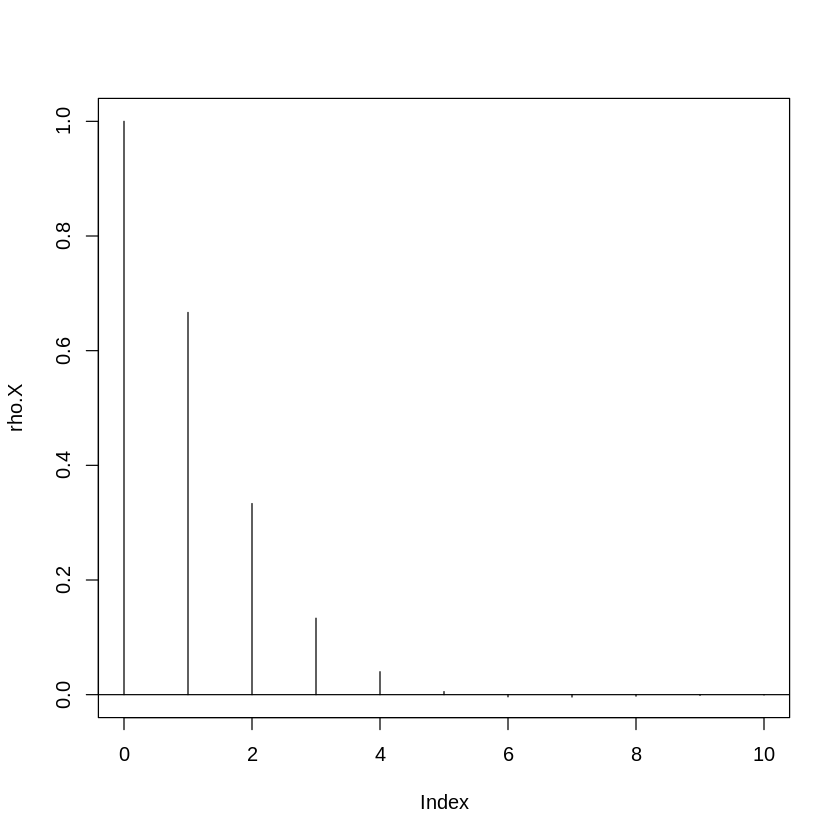

In [ ]:
# Step 11:
# Plotting the result in the same sort of typical ACF plots we have seen in time series dataset, using the following:
rho.X <-Re(rho.X)
plot(rho.X, type = 'h', xlim = c(0,10), ylim = c(0,1))
abline(h=0)
points(0,1, type='h')


**Summary**

* **Roots and Causality:** The roots confirm that the process is causal because they lie within the unit circle.
* **ACF Formula**: Using the ACF formula for complex conjugate roots.

* **Verification:** The computed ACF values match those from ARMAacf, confirming the correctness of our calculations.
* **Plot:** The ACF plot shows an oscillatory, decaying pattern typical of an AR(2) process with complex conjugate roots, indicating short-term cyclical dependencies in the data.

**Conclusion:** The computed ACF values match those from the ARMAacf function, confirming the correctness of our calculations. The plot illustrates an oscillatory, exponentially decaying ACF consistent with an AR(2) process with complex conjugate roots.

**Question 5:** **For each of the following problems, compute formulas for the ACF of the given process. Show all
the steps you take to get to your answer. You are of course allowed (and encouraged) to use R to help
you with the computations, but you should include all steps necessary for someone who is not in front of
a computer to be able to follow your work. Note: You can and should use ARMAacf to check your final
answer. However, you cannot use it to do all the work for you: A list of ACF values without any work or
formula will be awarded zero credit.**

**The AR(3) process Xt − 0.6Xt−1 − 0.37Xt−2 + 0.21Xt−3 = Wt**

**Answer 5:**

Step-by-Step Solution for ACF of the AR(3) Process
Given the AR(3) process:

**Xt − 0.6Xt−1 − 0.37Xt−2 + 0.21Xt−3 = Wt**

We can write it as:

**Xt = 0.6Xt−1 + 0.37Xt−2 - 0.21Xt−3 + Wt**

Where Wt is white noise and variance σ square

**Step 1: Identify the AR coefficients:**
* Φ(1) = 0.6
* Φ(2)= 0.37
* Φ(3)= -0.21

**Step 2: Write the Characteristic Polynomial**
The characteristic polynomial for this AR(3) model is:
**Φ(z) = 1 -0.6z - 0.37z^2 + 0.21z^3 = (1-z/r1) (1-z/r2) (1-z/r3) = (1-0.5z) (1+0.6z) (1-0.7z)**


**Step 3: Solve for the roots of the Polynomial:** The roots of the polynomial, which are calclated in R, tell us about the the behavior of the ACF. We can factor as r1 inverse, r2 inverse, and r3 inverse and executing in R "polyroot(c(0.21, -0.37, -0.6, 1))" or you can use the phi.zinv as mentioned in the code below as well and this yields **r1 inverse = 0.5 and r2 inverse = -0.6, and r3 inverse = 0.7**.

**Explanation:**
The polyroot function finds the roots of the characteristic polynomial. For this example, suppose we get distinct real roots: r1, r2 and r3. If the roots were complex or repeated, the structure of the ACF would be adjusted accordingly.

**Step 4: Verify Causality:**
Since the magnitudes of these roots |r1|, |r2|, |r3| are greater than 1 (indicating they lie outside the unit circle), we conclude that the process is causal.


In [ ]:
# Define AR coefficients and solve for roots (distinct case)
phi <- c(0.6, 0.37, -0.21)
phi.zinv <- c(-phi[3], -phi[2], -phi[1], 1)
r.inv <- polyroot(phi.zinv)
r.inv <- Re(r.inv)  # Extract real parts of roots
r.inv


[1]  0.5 -0.6  0.7

**Step 5: Set up the Difference Equation for the ACF**

Multiplying both sides X(t-h), take the expectation, and divide by γx(0), the result is:

**ρx(h) - 0.6ρx(h-1) - 0.37ρx(h-2) + 0.21ρx(h-3)  = 0, for h ≥ 3**

**Step 6: Manually Calculate Initial Conditions**
To calculate ρx(1) and ρx(2) manually, we do the following:
* **ρx(0) = 1 by definition**

* **Equation for ρx(1):  ρx(1) = 0.6 + 0.37ρx(1) - 0.21ρx(2)**
* **Equation for ρx(2):  ρx(2) = 0.6ρx(1) + 0.37 - 0.21ρx(1)**

**Step 7: Solve the Equations Step-by-Step**

Rewrite the equations to isolate ρx(1) and ρx(2):

* **ρx(1) - 0.37ρx(1) = 0.6 - 0.21ρx(2)**
* **ρx(1)(1 - 0.37) = 0.6 - 0.21ρx(2)**
***ρx(1) = 0.6 - 0.21ρx(2)/0.63**
* Substitute this expression forρx(1) into the equation for ρx(2) to solve iteratively.

* Solving them by hand is complex, but the approach above provides the setup needed to proceed with solving manually or using matrix algebra.

* These equations can now be solved by substitution or using numerical methods as shown in the R code below:
* If you include ρx(2) value shown in the code below "0.6561315" in the step 7 equation, you will find ρx(1)

**Step 8: Construct the Matrix for Coefficients c1, c2, and c3:** (Code below)

In [ ]:
# Solving for initial ACF values (rho(0), rho(1), and rho(2))
B <- matrix(c(phi[2] - 1, phi[1] + phi[3], phi[3], -1), 2, 2)
phi.m <- matrix(c(-phi[1], -phi[2]))
rho.init <- c(1, solve(B, phi.m))  # Set initial conditions rho(0) = 1, solve for rho(1) and rho(2)
print(rho.init) # Outputs rho(0), rho(1), rho(2)

# Construct matrix A to solve for coefficients c1, c2, and c3 based on initial conditions
A <- matrix(c(1, r.inv[1], r.inv[1]^2,
              1, r.inv[2], r.inv[2]^2,
              1, r.inv[3], r.inv[3]^2), 3, 3)
c <- solve(A, rho.init)  # Solve for coefficients c1, c2, and c3
print(c)  # Coefficients for distinct roots


[1] 1.0000000 0.7336705 0.6561315
[1] -0.73983833  0.08792093  1.65191740


**Step 9: Calculate the ACF for Higher Lags:**
Using the formula: **ρx(h) = c1 r1 ^ h + c2 r2 ^ h + c3 r3 ^ h**

We calculate higher lags using the below for loop:


In [ ]:
# Calculate ACF for lags up to 20 using distinct roots
rho.X <- numeric(20)  # Initialize ACF vector
for (h in 1:20) {
  rho.X[h] <- c[1] * r.inv[1]^h + c[2] * r.inv[2]^h + c[3] * r.inv[3]^h
}

# Display computed ACF values
print("ACF values calculated using for loop and compare them with ARMAacf:")
print(rho.X)


[1] "ACF values calculated using for loop and compare them with ARMAacf:"
 [1] 0.733670459 0.656131479 0.455136957 0.361780025 0.247681079 0.186888496
 [7] 0.127801291 0.093816492 0.064329789 0.046471704 0.031983581 0.022875423
[13] 0.015800121 0.011227427 0.007778662 0.005503320 0.003822337 0.002696112
[19] 0.001876235 0.001320611


**Step 10: Verification with ARMAacf:**

Use the ARMAacf function to verify our computed values:

In [ ]:
# Use ARMAacf to verify results
acf_check <- ARMAacf(ar = phi, lag.max = 20)
print("ACF values from ARMAacf for comparison:")
print(acf_check)


[1] "ACF values from ARMAacf for comparison:"
          0           1           2           3           4           5 
1.000000000 0.733670459 0.656131479 0.455136957 0.361780025 0.247681079 
          6           7           8           9          10          11 
0.186888496 0.127801291 0.093816492 0.064329789 0.046471704 0.031983581 
         12          13          14          15          16          17 
0.022875423 0.015800121 0.011227427 0.007778662 0.005503320 0.003822337 
         18          19          20 
0.002696112 0.001876235 0.001320611 


**Step 11: Plot the ACF Values:**
Plot the results for visualization:

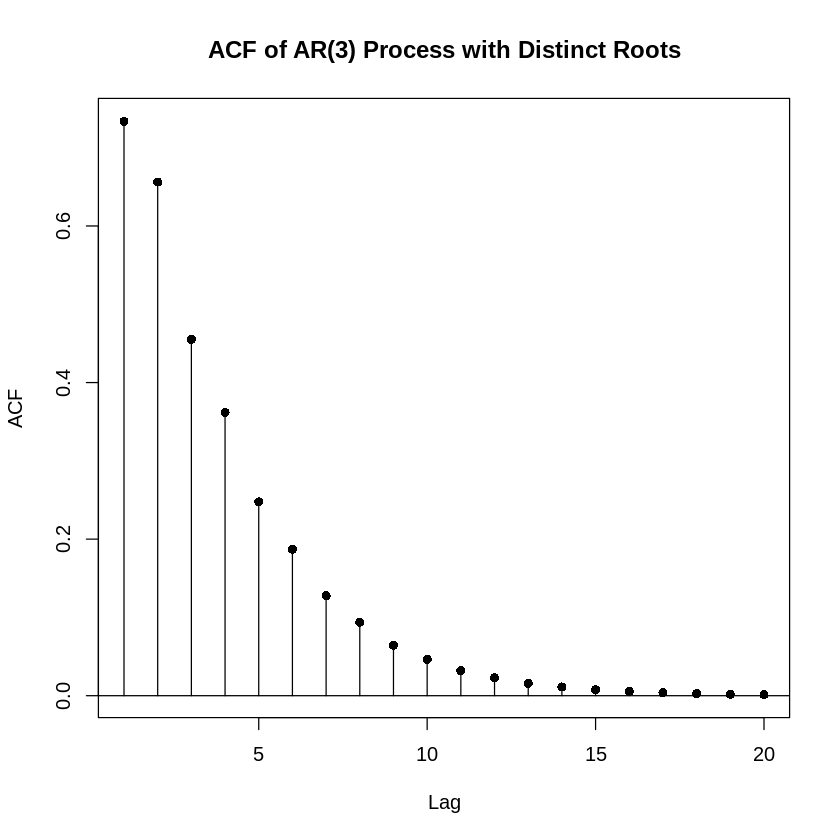

In [ ]:
# Plot the ACF values
plot(1:20, rho.X, type = "h", main = "ACF of AR(3) Process with Distinct Roots", xlab = "Lag", ylab = "ACF")
abline(h = 0)
points(1:20, rho.X, pch = 16)

**Summary**

* **Roots and Causality:** The roots confirm that the process is causal because they lie within the unit circle.
* **ACF Formula**: The ACF formula was derived using distinct real roots, which lead to an exponentially decaying pattern in the ACF, consistent with the non-oscillatory nature observed

* **Verification:** The computed ACF values match those from ARMAacf, confirming the correctness of our calculations.
* **Plot:** The ACF plot shows a smooth, exponentially decaying pattern typical of an AR(3) process with distinct real roots, indicating limited short-term dependencies in the data without cyclical behavior.

**Conclusion:** The computed ACF values match those from the ARMAacf function, confirming the correctness of our calculations. The plot illustrates an oscillatory, exponentially decaying ACF consistent with an AR(3) process with distinct roots.

**Question 6:** **For each of the following problems, compute formulas for the ACF of the given process. Show all
the steps you take to get to your answer. You are of course allowed (and encouraged) to use R to help
you with the computations, but you should include all steps necessary for someone who is not in front of
a computer to be able to follow your work. Note: You can and should use ARMAacf to check your final
answer. However, you cannot use it to do all the work for you: A list of ACF values without any work or
formula will be awarded zero credit.**

**The AR(2, 1) process Xt = 0.2Xt−1 + 0.08Xt−2 + Wt + .7Wt−1.**

**Answer 6:**

Step-by-Step Solution for ACF of the ARMA(2,1) Process
Given the ARMA(2,1) process:

**Xt = 0.2Xt−1 + 0.08Xt−2 + Wt + .7Wt−1**

First, let's write the process in standard form:**Xt - 0.2Xt−1 - 0.08Xt−2 = Wt + .7Wt−1**

Where Wt is white noise and variance σ square

**Step 1: Identify the AR coefficients:**
* Φ(1) = -0.2
* Φ(2)= -0.08

**Step 2: **First, we note that the autoregressive polynomial and Write the Characteristic Polynomial**

**Φ(z) = 1 -0.2z - 0.08z^2  = (1-z/r1) (1-z/r2) = (1+0.2z) (1-0.4z)**


**Step 3: Solve for the roots of the Polynomial:** The roots of the polynomial, which are calclated in R, tell us about the the behavior of the ACF. We can factor as r1 inverse and r2 inverse and executing in R "polyroot(c(0.2, 0.08, 1))" or you can use the phi.zinv as mentioned in the code below as well and this yields **r1 inverse = -0.2 and r2 inverse = 0.4**.

**Explanation:**
The polyroot function finds the roots of the characteristic polynomial. For this example, suppose we get distinct real roots: r1 and r2. If the roots were complex or repeated, the structure of the ACF would be adjusted accordingly.

**Step 4: Verify Causality:**
Since the magnitudes of these roots |r1| and |r2| are greater than 1 (indicating they lie outside the unit circle), we conclude that the process is causal.


In [ ]:
# Define AR coefficients and solve for roots (distinct case)
phi <- c(0.2, 0.08)
phi.zinv <- c(-phi[2], -phi[1], 1)
r.inv <- polyroot(phi.zinv)
r.inv <- Re(r.inv)
print(r.inv)

[1] -0.2  0.4


**Step 5: We can also note that there are no common factors with the moving average polynomial θ(z) = 1+0.7z**

Therefore, we can write:
* $$
X_t = \psi(B) W_t = \sum_{j=0}^{\infty} \psi_j W_{t-j}, \quad t \in \mathbb{Z}
$$

For some coefficients ψ0, ψ1, ψ2...with ψ0=1, we use ψ(B) to denote the associated linear filter.

Next, multiply both side of (1) by X(t-h) and take expectations:

$$
\mathbb{E}[X_t X_{t-h}] - 0.2 \, \mathbb{E}[X_{t-1} X_{t-h}] - 0.08 \, \mathbb{E}[X_{t-2} X_{t-h}] = \mathbb{E}[W_t X_{t-h}] + 0.7 \, \mathbb{E}[W_{t-1} X_{t-h}]
$$

Since the process is mean-zero, the left side reduces to:
* $$
\gamma_x(h) - 0.2 \, \gamma_x(h-1) - 0.08 \, \gamma_x(h-2) = 0
$$

Furthermore, since the process is causal, we have:
$$\mathbb{E}[W_t X_{t-h}] = 0,  for  h\geq 1
$$

$$\mathbb{E}[W_t X_{t-h}] = 0,  for  h\geq 2
$$

Therefore, we have a recursive relation
$$
\gamma_x(h) - 0.2 \, \gamma_x(h-1) - 0.08 \, \gamma_x(h-2) = 0, \quad \text{for } h \geq 2
$$

Once we know γX(0) and γX(1), we can easily solve this in the same way that we usually do for Ar(2) processes. However, finding γX(0) and γX(1) is more challenging here, since the right side of (3) vanishes only for h greater than equal to 2 (and not when h=1).

To find γX(0) and γX(1), we write down (3) for h = 0, 1, 2. (Even though our focus is on solving
for γX(0) and γX(1), we need all three of these equations to get a closed system; we end up solving for
γX(0), γX(1), and γX(2) simultaneously.) We use σ
2
for the variance of the white noise process. The
three equations are as follows.

* $$
\gamma_X(0) - 0.2 \, \gamma_X(1) - 0.08 \, \gamma_X(2) = \mathbb{E}[W_t X_t] + 0.7 \, \mathbb{E}[W_{t-1} X_t] = \psi_0 \sigma^2 + 0.7 \psi_1 \sigma^2
$$

* $$
\gamma_X(1) - 0.2 \, \gamma_X(0) - 0.08 \, \gamma_X(1) = 0 + 0.7 \, \mathbb{E}[W_{t-1} X_{t-1}] = 0.5 \psi_0 \sigma^2
$$

* $$
\gamma_X(2) - 0.2 \, \gamma_X(1) - 0.08 \, \gamma_X(0) = 0
$$

or in matrix form:

$$
\begin{bmatrix}
1 & -0.2 & -0.08 \\
-0.2 & .92 & 0 \\
-0.08 & -0.2 & 1 \\
\end{bmatrix}
\begin{bmatrix}
\gamma_X(0) \\
\gamma_X(1) \\
\gamma_X(2) \\
\end{bmatrix}
=
\begin{bmatrix}
1 + 0.7 \, \psi_1 \\
0.7 \\
0 \\
\end{bmatrix} \sigma^2
$$

**In order to solve this system, we need to know ψ1. We can do this by noting that (for appropriate z)**

* ψ(z) = ϕ(z)^-1 θ(z) = (1- (-0.2z))^-1 (1-0.4z)^-1 (1+0.7z)

**To compute this manually it is very complex, we will use R to compute this using function called "ARMAtoMA**











In [ ]:
psi1<-ARMAtoMA(ar = c(0.2, 0.08), ma=0.7, lag.max = 1)
psi1

[1] 0.9

**Step 6: Calculating the auto covariance:**

In [ ]:
#With all this in hand, we execute the following:
A1 <- matrix(c(1, -0.2, -0.08, -0.2, 0.92, -0.2, -0.08, 0, 1), 3, 3)
b1 <- c(1 + 0.7*psi1, 0.7, 0)
gamma.012 <- solve(A1, b1)
print(gamma.012)

[1] 1.895484 1.172931 0.386225


**Step 7: Calculate the ρx(1) = γx(1)/γx(0) = 1.017/1.845 = 0.551**

In [ ]:
# Calculate rhox(1):

rho1 <- gamma.012[2] / gamma.012[1]
print(rho1)

[1] 0.618803


**Step 8: Solving the recursive relation:**

$$
\begin{cases}
\rho_X(h) - 0.2 \rho_X(h - 1) - 0.08 \rho_X(h - 2) = 0, & h \geq 2 \\
\rho_X(0) = 1, & \rho_X(1) = 0.618803
\end{cases}
$$

Since the polynomial \( 1 - 0.2z - 0.08z^2 \) has two distinct roots \( (-0.2)^{-1} \) and \( (0.4)^{-1} \), the solution is of the form:

$$
\rho_X(h) = c_1 (-0.2)^h + c_2 (0.4)^h, \quad h \geq 0.
$$


Where c1 and c2 can be determined from the values of ρx(0) and ρx(1) via the equation:

$$
\begin{bmatrix}
\rho_X(0) \\
\rho_X(1) \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 \\
-0.2 & 0.4 \\
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2 \\
\end{bmatrix}
$$

**The below R will evaluate the coefficients:**

In [ ]:
A <- matrix(c(1, -0.2, 1, 0.4), 2, 2)
b <- c(1, rho1)
c <- solve(A, b)
print(c)

[1] -0.3646717  1.3646717


**Hence the results are c1 = -0.3646717 and c2 = 1.3646717**

**So that our final formula is:**

* $$
\rho_X(h) \approx (-0.3646717) \, (-0.2)^h + 1.3646717 \, (0.4)^h, \quad h \geq 0.
$$

Of course, this should be checked against the ARMAacf routine. To do this, execute the following.

In [ ]:
rho.X <- NULL
r.inv <- polyroot(c(-0.08, -0.2, 1))
for(h in 1:10){
rho.X[h] = Re(c[1]*r.inv[1]^h + c[2]*r.inv[2]^h) }
rho.X[1:10]

[1] 0.6188030046 0.2037606009 0.0902563606 0.0343521202 0.0140909329
 [6] 0.0055663562 0.0022405459 0.0008934177 0.0003579272 0.0001430589

**Step 9: Verification with ARMAacf:**

Use the ARMAacf function to verify our computed values:

In [ ]:
theoretical_acf <- ARMAacf(ar = c(0.2, 0.08), ma = 0.7, lag.max = 10)
theoretical_acf

0            1            2            3            4            5 
1.0000000000 0.6188030046 0.2037606009 0.0902563606 0.0343521202 0.0140909329 
           6            7            8            9           10 
0.0055663562 0.0022405459 0.0008934177 0.0003579272 0.0001430589

**Step 10: Plot the ACF Values:**
Plot the results for visualization:

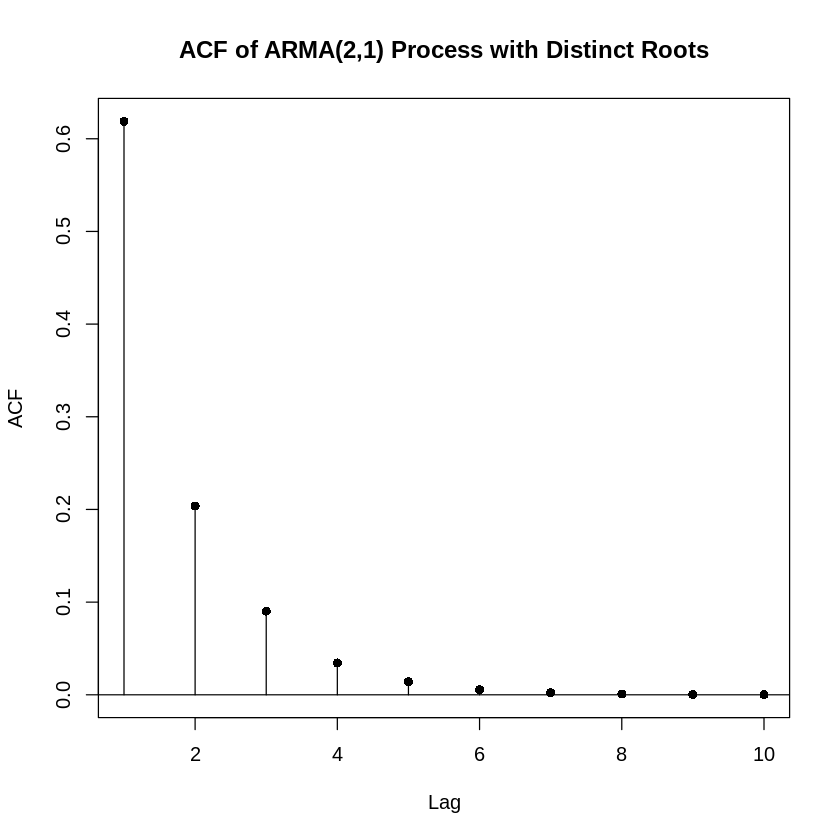

In [ ]:
# Plot the ACF values
plot(1:10, rho.X, type = "h", main = "ACF of ARMA(2,1) Process with Distinct Roots", xlab = "Lag", ylab = "ACF")
abline(h = 0)
points(1:10, rho.X, pch = 16)

**Summary**

* **Roots and Causality:** The roots of the AR part of the process confirm that it is causal since their inverses lie within the unit circle. This satisfies the condition for causality in an ARMA(2,1) process.

* **ACF Formula:** The derived ACF formula uses real, distinct roots, leading to a smoothly decaying, non-oscillatory pattern, typical of an ARMA(2,1) process with such roots.

* **Verification:** The computed ACF values align with those from ARMAacf, confirming the correctness of our calculations.

* **Plot:** The ACF plot displays a smooth, exponentially decaying pattern, indicative of an ARMA(2,1) process with real roots. This pattern suggests short-term dependencies without cyclical behavior.

**Conclusion:** The computed ACF values match those from the ARMAacf function, validating our calculations. The plot illustrates a smooth, exponentially decaying ACF, consistent with the expected behavior for an ARMA(2,1) process with distinct real roots.